# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

`steam_reviews.csv` from
https://www.kaggle.com/datasets/najzeko/steam-reviews-2021

`games.csv` from
https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

# Dataset Loading


In [2]:
data = pd.read_csv('steam_reviews.csv')
data = data.dropna()
data = data.drop_duplicates()
data = data.reset_index(drop=True)

data.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21687945 entries, 0 to 21687944
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

In [4]:
games = data['app_name'].nunique()
print('Number of games:', games)
reviews = data['review'].count()
print('Number of reviews:', reviews)

Number of games: 315
Number of reviews: 21687945


## Temporary measures to speed things up

In [5]:
## Remove all but the most reviewed games
#popular_games = data['app_name'].value_counts().head(100).index
#data = data[data['app_name'].isin(popular_games)]
#data['app_name'].unique()

In [6]:
games = data['app_name'].nunique()
print('Number of games:', games)
reviews = data['review'].count()
print('Number of reviews:', reviews)

Number of games: 315
Number of reviews: 21687945


In [7]:
# Use categorical data types to reduce memory usage
data['app_id'] = data['app_id'].astype('category')
data['language'] = data['language'].astype('category')

# Preprocessing

In [8]:
# Create a cleaner date column, go by weeks
data['date_created'] = pd.to_datetime(data['timestamp_created'], unit='s')
data['date_created'] = data['date_created'].dt.to_period('W').dt.start_time

data['date_updated'] = pd.to_datetime(data['timestamp_updated'], unit='s')
data['date_updated'] = data['date_updated'].dt.to_period('W').dt.start_time
data.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,date_created,date_updated
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09,2021-01-18,2021-01-18
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09,2021-01-18,2021-01-18
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09,2021-01-18,2021-01-18
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09,2021-01-18,2021-01-18
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09,2021-01-18,2021-01-18


In [9]:
# Find earliest and latest review in the dataset
earliest_review = data['date_created'].min()
latest_review = data['date_created'].max()
print('Earliest review:', earliest_review)
print('Latest review:', latest_review)

Earliest review: 2010-11-15 00:00:00
Latest review: 2021-01-18 00:00:00


In [10]:
import numpy as np
import dask.dataframe as dd

# Define custom aggregation for the 'recommended' column without meta
positive_agg = dd.Aggregation(
    name="positive_reviews",
    chunk=lambda s: np.sum(s == True),
    agg=lambda s: np.sum(s),
    finalize=lambda s: s
)

ddf = dd.from_pandas(data, npartitions=8)  # Adjust as needed

daily_reviews = ddf.groupby(['app_id', 'date_created']).agg({
    'review_id': 'count',
    'recommended': 'sum'  # True values are treated as 1
}).rename(columns={'review_id': 'total_reviews', 'recommended': 'positive_reviews'})

daily_reviews = daily_reviews.compute()

c:\Users\euanr\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\dask_expr\_groupby.py:1561: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self._meta = self.obj._meta.groupby(


In [11]:
daily_reviews.head()

total_reviews  positive_reviews
app_id date_created                                 
292030 2021-01-18             1539              1499
       2021-01-11             2500              2409
       2021-01-04             3538              3437
       2020-12-28             4353              4229
       2020-12-21             3908              3802

In [12]:
daily_reviews.index.get_level_values('app_id').unique()

CategoricalIndex([ 292030,      70,     240,     420,     620,    2870,
                     4000,    8930,  381210,  289070,
                  ...
                  1158310, 1170880, 1180380, 1190460, 1222700, 1225330,
                  1229490, 1240210, 1289310, 1291340],
                 categories=[70, 240, 420, 620, ..., 1229490, 1240210, 1289310, 1291340], ordered=False, dtype='category', name='app_id', length=315)

In [13]:
# Count positive review proportion for each week, but add one negative review to every row so that the z-score method doesn't break for weeks with 0 negative reviews
daily_reviews['negative_prop'] = np.where(
    daily_reviews['total_reviews'] > 0,
    1 - ((daily_reviews['positive_reviews']) / (daily_reviews['total_reviews'] + 1)),
    0
)
daily_reviews.head()

total_reviews  positive_reviews  negative_prop
app_id date_created                                                
292030 2021-01-18             1539              1499       0.026623
       2021-01-11             2500              2409       0.036785
       2021-01-04             3538              3437       0.028822
       2020-12-28             4353              4229       0.028709
       2020-12-21             3908              3802       0.027373

# Reviewbomb Detection

In [14]:
def add_z_scores(group, window=7):

    group = group.sort_values('date_created')
    
    # Rolling metrics for total reviews
    group['rolling_mean'] = group['total_reviews'].rolling(window, min_periods=1).mean()
    group['rolling_std'] = group['total_reviews'].rolling(window, min_periods=1).std().fillna(0)
    group['z_score'] = (group['total_reviews'] - group['rolling_mean']) / group['rolling_std'].replace(0, 1)
    
    # Rolling metrics for negative proportion
    group['neg_rolling_mean'] = group['negative_prop'].rolling(window, min_periods=1).mean()
    group['neg_rolling_std'] = group['negative_prop'].rolling(window, min_periods=1).std().fillna(0)
    group['neg_z_score'] = (group['negative_prop'] - group['neg_rolling_mean']) / group['neg_rolling_std'].replace(0, 1)


    return group


bomb_flags_dataset = daily_reviews.copy(deep=True)
bomb_flags_dataset = bomb_flags_dataset.groupby('app_id').apply(add_z_scores)

# Set a z-score threshold for review bombs
bomb_flags_dataset['review_bomb_flag_volume'] = bomb_flags_dataset['z_score'] > 2.2
bomb_flags_dataset['review_bomb_flag_neg'] = bomb_flags_dataset['neg_z_score'] > 2.15

In [15]:
bomb_flags_dataset.head()

total_reviews  positive_reviews  negative_prop  \
app_id app_id date_created                                                   
70     70     2010-11-15                0                 0       0.000000   
              2010-11-22                9                 9       0.100000   
              2010-11-29               14                14       0.066667   
              2010-12-06                5                 5       0.166667   
              2010-12-13               25                25       0.038462   

                            rolling_mean  rolling_std   z_score  \
app_id app_id date_created                                        
70     70     2010-11-15        0.000000     0.000000  0.000000   
              2010-11-22        4.500000     6.363961  0.707107   
              2010-11-29        7.666667     7.094599  0.892698   
              2010-12-06        7.000000     5.944185 -0.336463   
              2010-12-13       10.600000     9.555103  1.507048   

                            neg_rolling_mean  neg_rolling_std  neg_z_score  \
app_id app_id date_created                                                   
70     70     2010-11-15            0.000000         0.000000     0.000000   
              2010-11-22            0.050000         0.070711     0.707107   
              2010-11-29            0.055556         0.050918     0.218218   
              2010-12-06            0.083333         0.069389     1.200961   
              2010-12-13            0.074359         0.063355    -0.566611   

                            review_bomb_flag_volume  review_bomb_flag_neg  
app_id app_id date_created                                                 
70     70     2010-11-15                      False                 False  
              2010-11-22                      False                 False  
              2010-11-29                      False                 False  
              2010-12-06                      False                 False  
              2010-12-13                      False                 False

In [16]:
# Remove the duplicate app_id level
bomb_flags_dataset.index = bomb_flags_dataset.index.droplevel(0)

In [17]:
# Set review_bomb_flag_neg to False for the first row where negative_prop != 0 for each app_id
def reset_first_negative_flag(group):
    # Find the first row where negative_prop != 0
    first_nonzero_index = group[group['negative_prop'] != 0].index.min()
    if first_nonzero_index is not None:
        group.loc[first_nonzero_index, 'review_bomb_flag_neg'] = False
    return group

bomb_flags_dataset = bomb_flags_dataset.groupby('app_id').apply(reset_first_negative_flag)

In [18]:
# Remove the duplicate app_id level
bomb_flags_dataset.index = bomb_flags_dataset.index.droplevel(0)
bomb_flags_dataset.head(50)

total_reviews  positive_reviews  negative_prop  \
app_id date_created                                                   
70     2010-11-15                0                 0       0.000000   
       2010-11-22                9                 9       0.100000   
       2010-11-29               14                14       0.066667   
       2010-12-06                5                 5       0.166667   
       2010-12-13               25                25       0.038462   
       2010-12-20               22                22       0.043478   
       2010-12-27               19                19       0.050000   
       2011-01-03               11                11       0.083333   
       2011-01-10               12                12       0.076923   
       2011-01-17                3                 3       0.250000   
       2011-01-24                8                 8       0.111111   
       2011-01-31                4                 4       0.200000   
       2011-02-07                6                 6       0.142857   
       2011-02-14                7                 7       0.125000   
       2011-02-21                7                 7       0.125000   
       2011-02-28                4                 4       0.200000   
       2011-03-07                3                 3       0.250000   
       2011-03-14                5                 5       0.166667   
       2011-03-21                3                 3       0.250000   
       2011-03-28                9                 9       0.100000   
       2011-04-04                3                 3       0.250000   
       2011-04-11               10                10       0.090909   
       2011-04-18                4                 4       0.200000   
       2011-04-25                3                 3       0.250000   
       2011-05-02                9                 9       0.100000   
       2011-05-09                3                 3       0.250000   
       2011-05-16                6                 6       0.142857   
       2011-05-23                3                 3       0.250000   
       2011-05-30                2                 2       0.333333   
       2011-06-06                6                 6       0.142857   
       2011-06-13                2                 2       0.333333   
       2011-06-20                8                 8       0.111111   
       2011-06-27               47                47       0.020833   
       2011-07-04               44                43       0.044444   
       2011-07-11               17                16       0.111111   
       2011-07-18                6                 6       0.142857   
       2011-07-25                5                 5       0.166667   
       2011-08-01                6                 6       0.142857   
       2011-08-08               12                11       0.153846   
       2011-08-15                5                 5       0.166667   
       2011-08-22                5                 5       0.166667   
       2011-08-29                8                 8       0.111111   
       2011-09-05                4                 4       0.200000   
       2011-09-12                6                 6       0.142857   
       2011-09-19                8                 8       0.111111   
       2011-09-26                6                 6       0.142857   
       2011-10-03                5                 5       0.166667   
       2011-10-10                6                 6       0.142857   
       2011-10-17                5                 5       0.166667   
       2011-10-24                5                 5       0.166667   

                     rolling_mean  rolling_std   z_score  neg_rolling_mean  \
app_id date_created                                                          
70     2010-11-15        0.000000     0.000000  0.000000          0.000000   
       2010-11-22        4.500000     6.363961  0.707107          0.050000   
       2010-11-2

In [19]:
# Save the dataset to a CSV file
bomb_flags_dataset.to_csv('steam_bomb_flags.csv', index=True)

# In-notebook analysis

In [20]:
# Find bomb tag proportion for each flag
for flag in ['review_bomb_flag_volume', 'review_bomb_flag_neg']:
    print(f'{flag}: {bomb_flags_dataset[bomb_flags_dataset[flag] == True].size / bomb_flags_dataset.size}')


review_bomb_flag_volume: 0.01308031984723714
review_bomb_flag_neg: 0.0016231053825038787


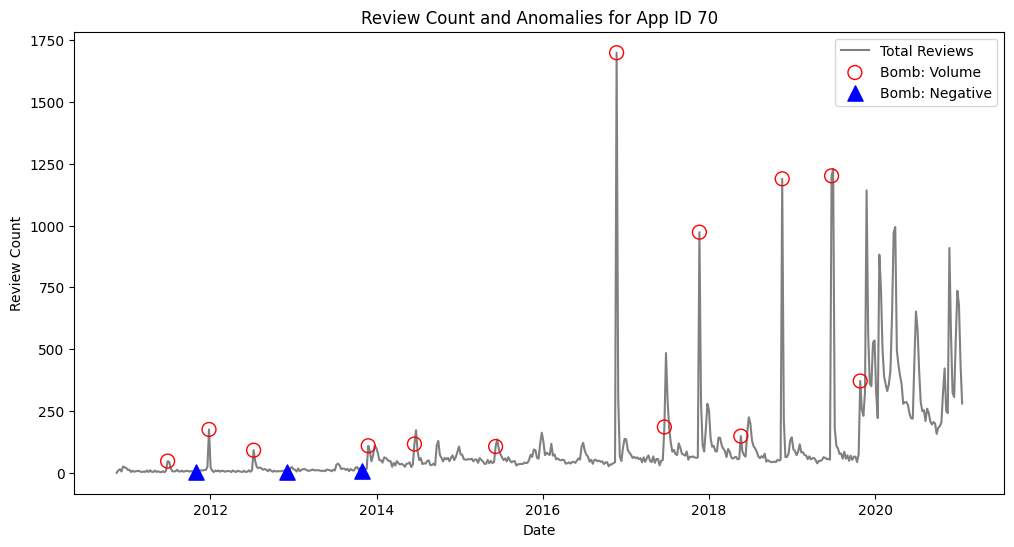

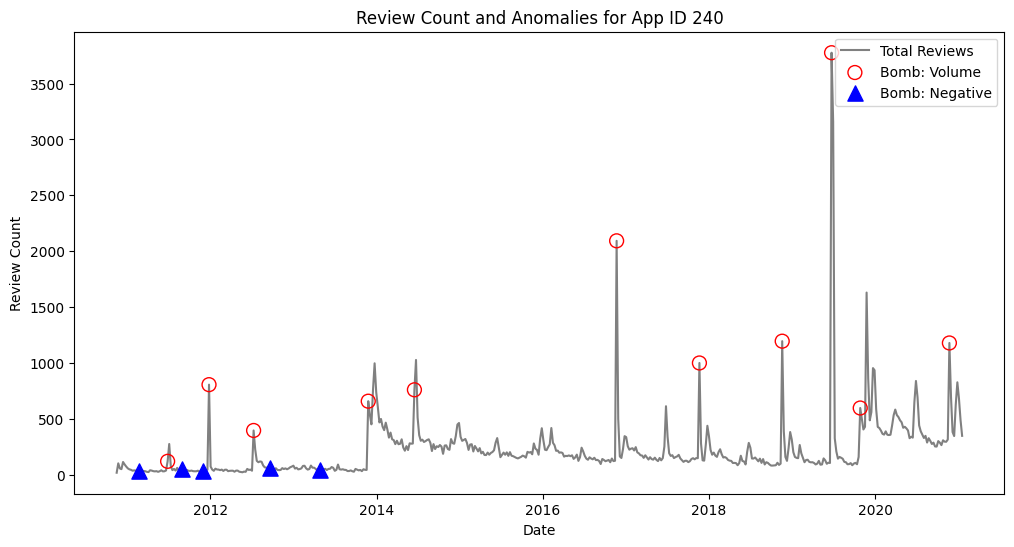

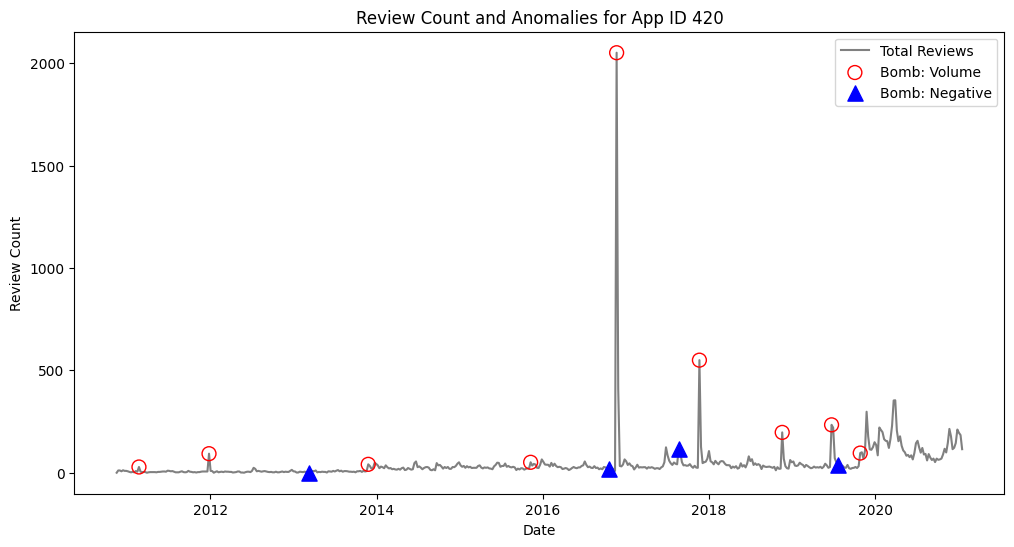

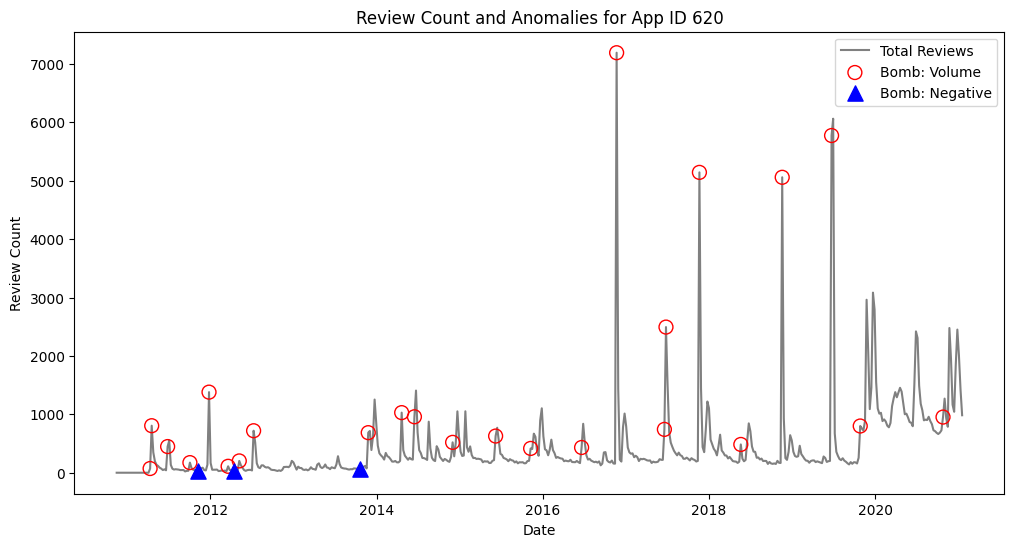

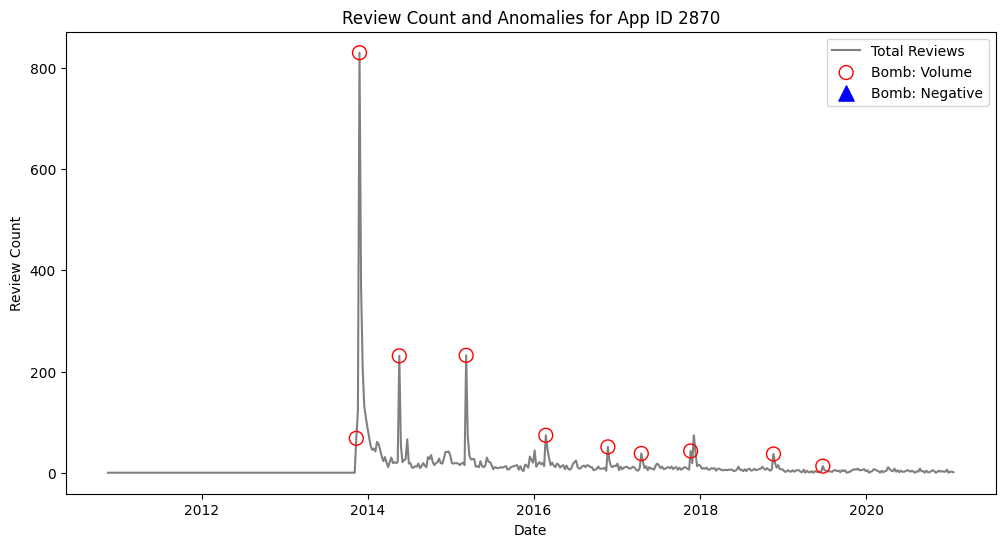

In [21]:
# Get unique app IDs from the MultiIndex
unique_app_ids = bomb_flags_dataset.index.get_level_values('app_id').unique()
unique_app_ids = unique_app_ids[:5]

for app_id in unique_app_ids:
    # Filter for a specific app_id and reset the index so 'date_created' becomes a column
    app_data = bomb_flags_dataset.xs(app_id, level='app_id').reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(app_data['date_created'], app_data['total_reviews'], label='Total Reviews', color='gray')
    #plt.plot(app_data['date_created'], app_data['rolling_mean'], label='Rolling Mean', linestyle='--', color='black')

    vol_idx = app_data['review_bomb_flag_volume']
    plt.scatter(app_data.loc[vol_idx, 'date_created'],
                app_data.loc[vol_idx, 'total_reviews'],
                marker='o', s=100, facecolors='none', edgecolors='red',
                label='Bomb: Volume', zorder=5)

    neg_idx = app_data['review_bomb_flag_neg']
    plt.scatter(app_data.loc[neg_idx, 'date_created'],
                app_data.loc[neg_idx, 'total_reviews'],
                marker='^', s=120, color='blue',
                label='Bomb: Negative', zorder=6)

    plt.xlabel('Date')
    plt.ylabel('Review Count')
    plt.title(f'Review Count and Anomalies for App ID {app_id}')
    plt.legend()
    plt.show()

# Determine reviewbomb factors, create many small datasets out of them.
## First, genres. import new dataset with genres for each app_id

In [22]:
# Load the games.csv file into a pandas DataFrame
genre_tags_path = '../genre_tags_dataset/games.csv'
games_df = pd.read_csv(genre_tags_path)

# Display the first few rows to confirm it loaded correctly
games_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [44]:
# Step 1: Reset the index of bomb_flags_dataset to make app_id a column
bomb_flags_dataset_reset = bomb_flags_dataset.reset_index()

# Step 2: Merge bomb_flags_dataset with games_df on app_id
merged_data = pd.merge(bomb_flags_dataset_reset, games_df, left_on='app_id', right_on='AppID', how='inner')

# Step 2.1: Calculate the average number of review bombs per game
bombs_per_game = bomb_flags_dataset.groupby('app_id').agg(
    total_bombs_neg=('review_bomb_flag_neg', 'sum')
).reset_index()

merged_data = pd.merge(merged_data, bombs_per_game[['app_id', 'total_bombs_neg']], on='app_id', how='left')

# Step 3: Split the Genres column into multiple rows
# Assume the Genres column contains comma-separated values
merged_data = merged_data.dropna(subset=['Genres'])  # Drop rows where Genres is NaN
merged_data = merged_data.assign(Genre=merged_data['Genres'].str.split(',')).explode('Genre')

# Step 4: Group by Genre and calculate review bomb statistics
genre_review_bombs = merged_data.groupby('Genre').agg(
    total_reviews=('total_reviews', 'sum'),
    total_positive_reviews=('positive_reviews', 'sum'),
    total_bombs_volume=('review_bomb_flag_volume', 'sum'),
    total_bombs_neg=('review_bomb_flag_neg', 'sum'),
    avg__negative_bombs_per_game=('total_bombs_neg', 'mean') 
).reset_index()

genre_review_bombs['total_negative_reviews'] = genre_review_bombs['total_reviews'] - genre_review_bombs['total_positive_reviews']

# Step 5: Calculate proportions of review bombs for each genre
genre_review_bombs['bomb_rate_volume'] = genre_review_bombs['total_bombs_volume'] / genre_review_bombs['total_reviews']
genre_review_bombs['bomb_rate_neg'] = genre_review_bombs['total_bombs_neg'] / genre_review_bombs['total_reviews']



# Display the resulting dataset
genre_review_bombs.sort_values(by='avg__negative_bombs_per_game', ascending=False, inplace=True)
genre_review_bombs

,Genre,total_reviews,total_positive_reviews,total_bombs_volume,total_bombs_neg,avg__negative_bombs_per_game,total_negative_reviews,bomb_rate_volume,bomb_rate_neg
12,Racing,612770,549736,43,13,2.166667,63034,0.000070,0.000021
16,Utilities,291036,285691,6,1,1.000000,5345,0.000021,0.000003
2,Animation & Modeling,291036,285691,6,1,1.000000,5345,0.000021,0.000003
4,Design & Illustration,291036,285691,6,1,1.000000,5345,0.000021,0.000003
10,Photo Editing,291036,285691,6,1,1.000000,5345,0.000021,0.000003
0,Action,13773361,11581663,1258,165,0.942857,2191698,0.000091,0.000012
7,Indie,8547617,8005891,1041,129,0.921429,541726,0.000122,0.000015
14,Sports,645529,553528,47,10,0.909091,92001,0.000073,0.000015
1,Adventure,9085194,7511295,887,110,0.901639,1573899,0.000098,0.000012
8,Massively Multiplayer,2995788,1955998,114,14,0.777778,1039790,0.000038,0.000005


In [45]:
# save that data to a csv file
genre_review_bombs.to_csv('genre_review_bombs.csv', index=False)

In [57]:
# How about price?
# Step 1: Merge the bomb_flags_dataset with the price data
# Assuming 'price' is a column in the games_df or data
merged_price_data = pd.merge(bomb_flags_dataset_reset, games_df[['AppID', 'Price']], left_on='app_id', right_on='AppID', how='inner')

# Step 2: Bin the price column into ranges
merged_price_data['Price_Bin'] = pd.cut(merged_price_data['Price'], bins=[0, 5, 10, 20, 50, 100, float('inf')], 
                                        labels=['0-5', '5-10', '10-20', '20-50', '50-100', '100+'])

# Step 3: Group by Price_Bin and calculate review bomb statistics
price_review_bombs = merged_price_data.groupby('Price_Bin').agg(
    total_reviews=('total_reviews', 'sum'),
    total_positive_reviews=('positive_reviews', 'sum'),
    total_bombs_volume=('review_bomb_flag_volume', 'sum'),
    total_bombs_neg=('review_bomb_flag_neg', 'sum')
).reset_index()

# Step 4: Calculate additional metrics
price_review_bombs['total_negative_reviews'] = price_review_bombs['total_reviews'] - price_review_bombs['total_positive_reviews']
price_review_bombs['bomb_rate_volume'] = price_review_bombs['total_bombs_volume'] / price_review_bombs['total_reviews']
price_review_bombs['bomb_rate_neg'] = price_review_bombs['total_bombs_neg'] / price_review_bombs['total_reviews']

# Step 5: Save the dataset to a CSV file
price_review_bombs.to_csv('price_review_bombs.csv', index=False)

# Display the resulting dataset
price_review_bombs


,Price_Bin,total_reviews,total_positive_reviews,total_bombs_volume,total_bombs_neg,total_negative_reviews,bomb_rate_volume,bomb_rate_neg
0,0-5,1087327,1042590,122,22,44737,0.000112,0.000020
1,5-10,3751960,3494721,391,57,257239,0.000104,0.000015
2,10-20,5985086,5503037,795,95,482049,0.000133,0.000016
3,20-50,5902151,5236033,653,63,666118,0.000111,0.000011
4,50-100,1266052,1092032,123,14,174020,0.000097,0.000011
5,100+,0,0,0,0,0,NaN,NaN


# Create datasets for things unrelated to review bombs. What gets more/less negative reviews?

In [25]:
# list columns in the dataset
print(data.columns.tolist())
data

['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played', 'date_created', 'date_updated']


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,date_created,date_updated
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09,2021-01-18,2021-01-18
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09,2021-01-18,2021-01-18
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09,2021-01-18,2021-01-18
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09,2021-01-18,2021-01-18
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09,2021-01-18,2021-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21687940,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,...,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09,2020-03-23,2020-03-23
21687941,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,...,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09,2020-03-23,2020-03-23
21687942,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,...,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09,2020-03-23,2020-03-23
21687943,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,1584986631,1586382422,True,0,...,False,76561198041763187,140,3,210.0,0.0,12.0,1.589715e+09,2020-03-23,2020-04-06


In [26]:
# Intention is a series of 100% stacked bar charts that show positive and negative review proportions for each metric

# Get positive and negative reviews for review language
positive_reviews = data[data['recommended'] == True].groupby('language')['review_id'].count()
negative_reviews = data[data['recommended'] == False].groupby('language')['review_id'].count()

# Combine the two series into a DataFrame
language_posneg = pd.DataFrame({
    'Positive': positive_reviews,
    'Negative': negative_reviews
}).fillna(0)
language_posneg = language_posneg.astype(int)

# get percentage of positive and negative reviews
language_posneg['Positive%'] = language_posneg['Positive'] / (language_posneg['Positive'] + language_posneg['Negative'])
language_posneg['Negative%'] = language_posneg['Negative'] / (language_posneg['Positive'] + language_posneg['Negative'])
language_posneg.sort_values(by='Positive%', ascending=False, inplace=True)

language_posneg = language_posneg.reset_index()

# save the data to a csv file
language_posneg.to_csv('language posneg.csv', index=False)

language_posneg

,language,Positive,Negative,Positive%,Negative%
0,romanian,31106,1480,0.954582,0.045418
1,portuguese,76740,4342,0.946449,0.053551
2,latam,66284,3752,0.946428,0.053572
3,polish,466831,26809,0.945691,0.054309
4,brazilian,789178,46771,0.944050,0.055950
5,spanish,753395,58204,0.928285,0.071715
6,czech,123728,9572,0.928192,0.071808
7,swedish,74030,5764,0.927764,0.072236
8,ukrainian,19497,1580,0.925037,0.074963
9,hungarian,65158,5486,0.922343,0.077657


In [27]:
# Get positive and negative reviews for received_for_free status
positive_reviews = data[data['recommended'] == True].groupby('received_for_free')['review_id'].count()
negative_reviews = data[data['recommended'] == False].groupby('received_for_free')['review_id'].count()

# Combine the two series into a DataFrame
received_for_free_posneg = pd.DataFrame({
    'Positive': positive_reviews,
    'Negative': negative_reviews
}).fillna(0)
received_for_free_posneg = received_for_free_posneg.astype(int)

# get percentage of positive and negative reviews
received_for_free_posneg['Positive%'] = received_for_free_posneg['Positive'] / (received_for_free_posneg['Positive'] + received_for_free_posneg['Negative'])
received_for_free_posneg['Negative%'] = received_for_free_posneg['Negative'] / (received_for_free_posneg['Positive'] + received_for_free_posneg['Negative'])
received_for_free_posneg.sort_values(by='Positive%', ascending=False, inplace=True)

received_for_free_posneg = received_for_free_posneg.reset_index()

# save the data to a csv file
received_for_free_posneg.to_csv('received_for_free posneg.csv', index=False)
received_for_free_posneg

,received_for_free,Positive,Negative,Positive%,Negative%
0,True,609631,76812,0.888101,0.111899
1,False,18359017,2642485,0.874176,0.125824


In [28]:
# written_during_early_access status
positive_reviews = data[data['recommended'] == True].groupby('written_during_early_access')['review_id'].count()
negative_reviews = data[data['recommended'] == False].groupby('written_during_early_access')['review_id'].count()

# Combine the two series into a DataFrame
written_during_early_access_posneg = pd.DataFrame({
    'Positive': positive_reviews,
    'Negative': negative_reviews
}).fillna(0)
written_during_early_access_posneg = written_during_early_access_posneg.astype(int)

# get percentage of positive and negative reviews
written_during_early_access_posneg['Positive%'] = written_during_early_access_posneg['Positive'] / (written_during_early_access_posneg['Positive'] + written_during_early_access_posneg['Negative'])
written_during_early_access_posneg['Negative%'] = written_during_early_access_posneg['Negative'] / (written_during_early_access_posneg['Positive'] + written_during_early_access_posneg['Negative'])
written_during_early_access_posneg.sort_values(by='Positive%', ascending=False, inplace=True)

written_during_early_access_posneg = written_during_early_access_posneg.reset_index()

# save the data to a csv file
written_during_early_access_posneg.to_csv('written_during_early_access posneg.csv', index=False)
written_during_early_access_posneg


,written_during_early_access,Positive,Negative,Positive%,Negative%
0,False,17314238,2363823,0.879875,0.120125
1,True,1654410,355474,0.823137,0.176863


# Quick viz tests
Actual visualizations done in Tableau.

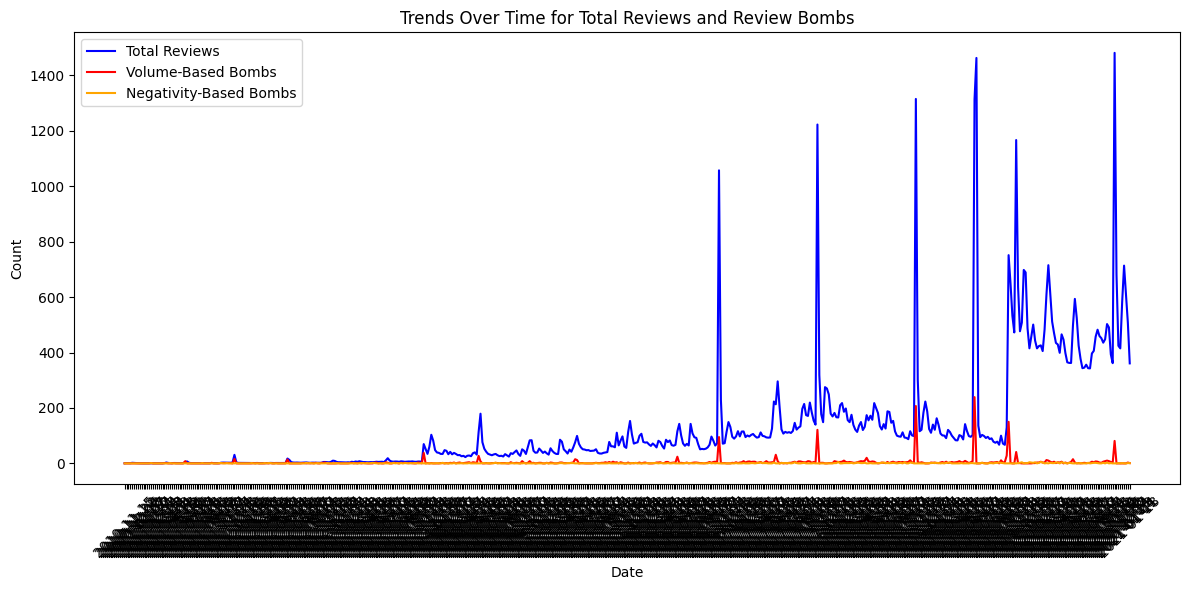

In [60]:
# Plot total reviews and review bomb flags over time
plt.figure(figsize=(12, 6))
steam_bomb_flags = pd.read_csv('steam_bomb_flags.csv')

# Aggregate data by date
time_data = steam_bomb_flags.groupby('date_created').agg(
    total_reviews=('total_reviews', 'mean'),
    review_bomb_volume=('review_bomb_flag_volume', 'sum'),
    review_bomb_neg=('review_bomb_flag_neg', 'sum')
).reset_index()

# Plot trends
plt.plot(time_data['date_created'], time_data['total_reviews'], label='Total Reviews', color='blue')
plt.plot(time_data['date_created'], time_data['review_bomb_volume'], label='Volume-Based Bombs', color='red')
plt.plot(time_data['date_created'], time_data['review_bomb_neg'], label='Negativity-Based Bombs', color='orange')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trends Over Time for Total Reviews and Review Bombs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\euanr\AppData\Local\Temp\ipykernel_2040\1213751898.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bomb_rate_neg', y='Genre', data=genre_review_bombs, palette='viridis')


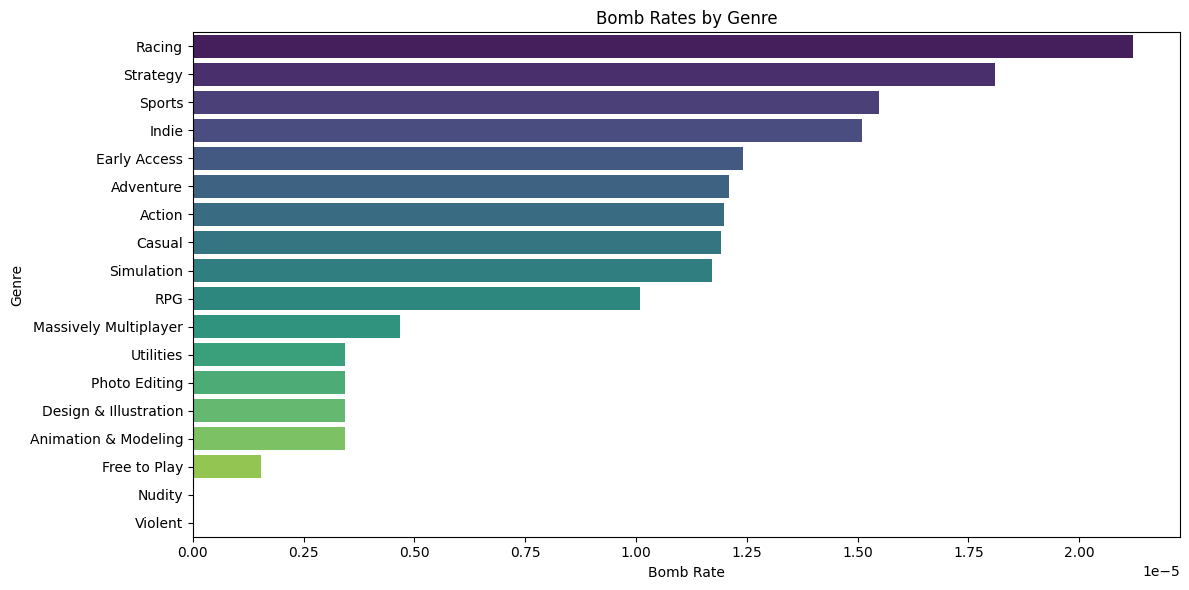

In [62]:
# Load genre review bombs data
genre_review_bombs = pd.read_csv('genre_review_bombs.csv')

# Bar plot for bomb rates by genre
plt.figure(figsize=(12, 6))
genre_review_bombs.sort_values(by='bomb_rate_neg', ascending=False, inplace=True)
sns.barplot(x='bomb_rate_neg', y='Genre', data=genre_review_bombs, palette='viridis')

plt.xlabel('Bomb Rate')
plt.ylabel('Genre')
plt.title('Bomb Rates by Genre')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

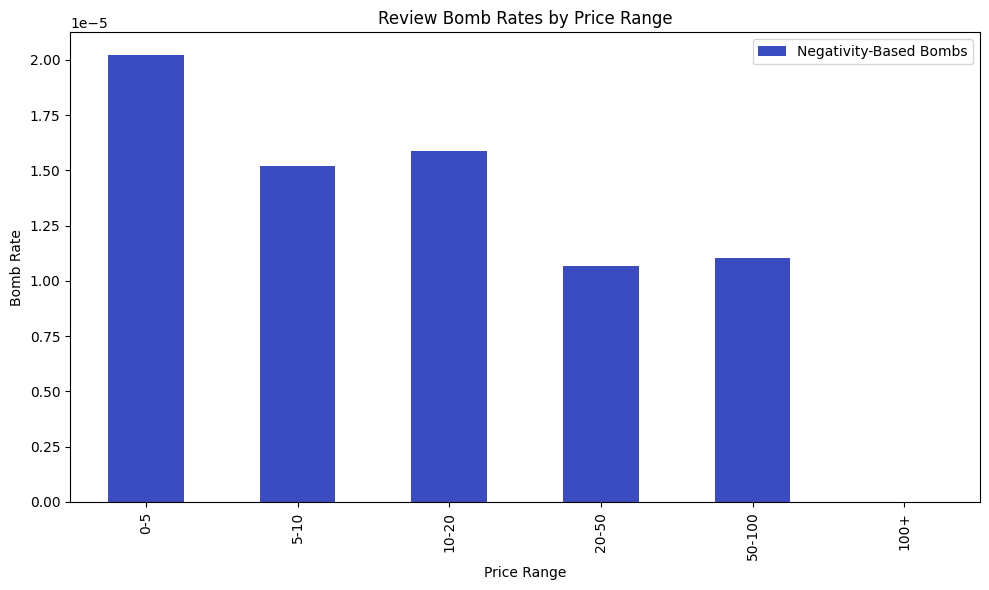

In [64]:
# Load price review bombs data
price_review_bombs = pd.read_csv('price_review_bombs.csv')

# Stacked bar chart for bomb rates by price range
plt.figure(figsize=(10, 6))
price_review_bombs.set_index('Price_Bin', inplace=True)
price_review_bombs[['bomb_rate_neg']].plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))

plt.xlabel('Price Range')
plt.ylabel('Bomb Rate')
plt.title('Review Bomb Rates by Price Range')
plt.legend(['Negativity-Based Bombs'])
plt.tight_layout()
plt.show()

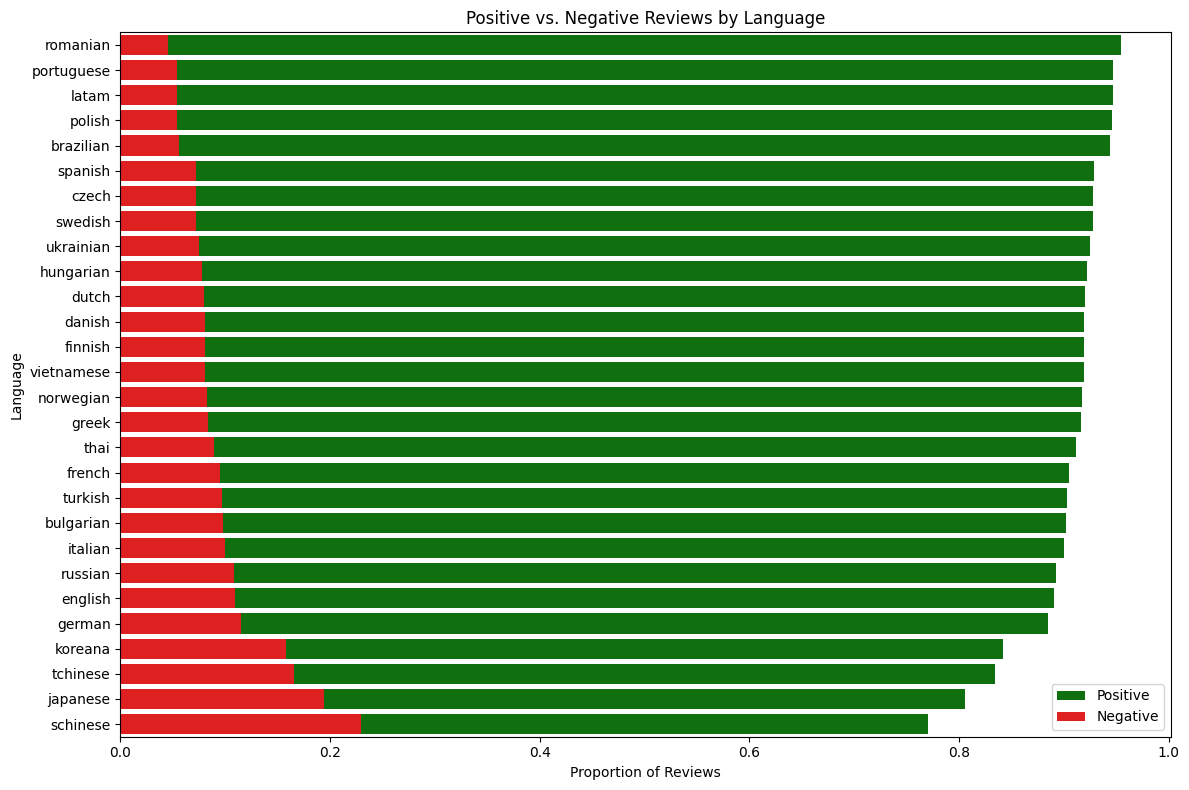

In [65]:
# Load language positivity/negativity data
language_posneg = pd.read_csv('language posneg.csv')

# Horizontal bar chart for positive and negative review proportions
plt.figure(figsize=(12, 8))
language_posneg.sort_values(by='Positive%', ascending=False, inplace=True)
sns.barplot(x='Positive%', y='language', data=language_posneg, color='green', label='Positive')
sns.barplot(x='Negative%', y='language', data=language_posneg, color='red', label='Negative')

plt.xlabel('Proportion of Reviews')
plt.ylabel('Language')
plt.title('Positive vs. Negative Reviews by Language')
plt.legend()
plt.tight_layout()
plt.show()

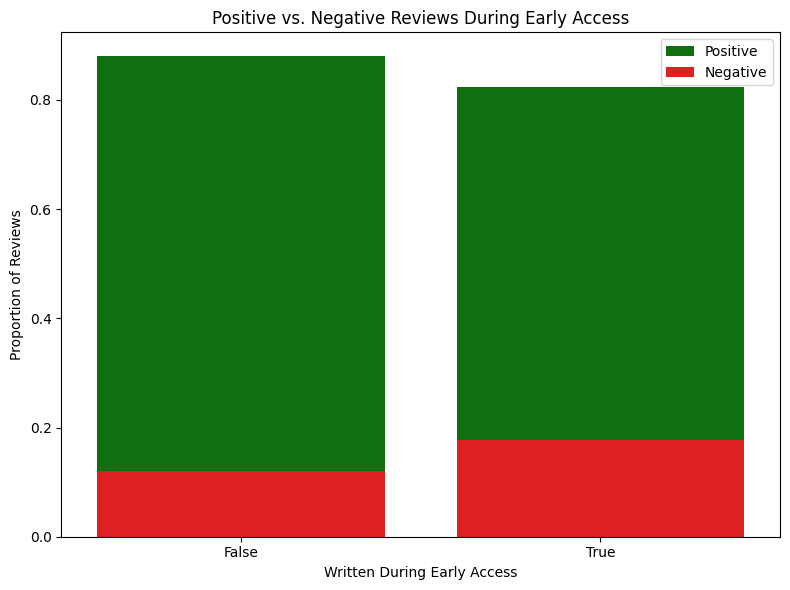

In [66]:
# Load early access review data
early_access_posneg = pd.read_csv('written_during_early_access posneg.csv')

# Bar chart for positive and negative reviews during early access
plt.figure(figsize=(8, 6))
sns.barplot(x='written_during_early_access', y='Positive%', data=early_access_posneg, color='green', label='Positive')
sns.barplot(x='written_during_early_access', y='Negative%', data=early_access_posneg, color='red', label='Negative')

plt.xlabel('Written During Early Access')
plt.ylabel('Proportion of Reviews')
plt.title('Positive vs. Negative Reviews During Early Access')
plt.legend()
plt.tight_layout()
plt.show()

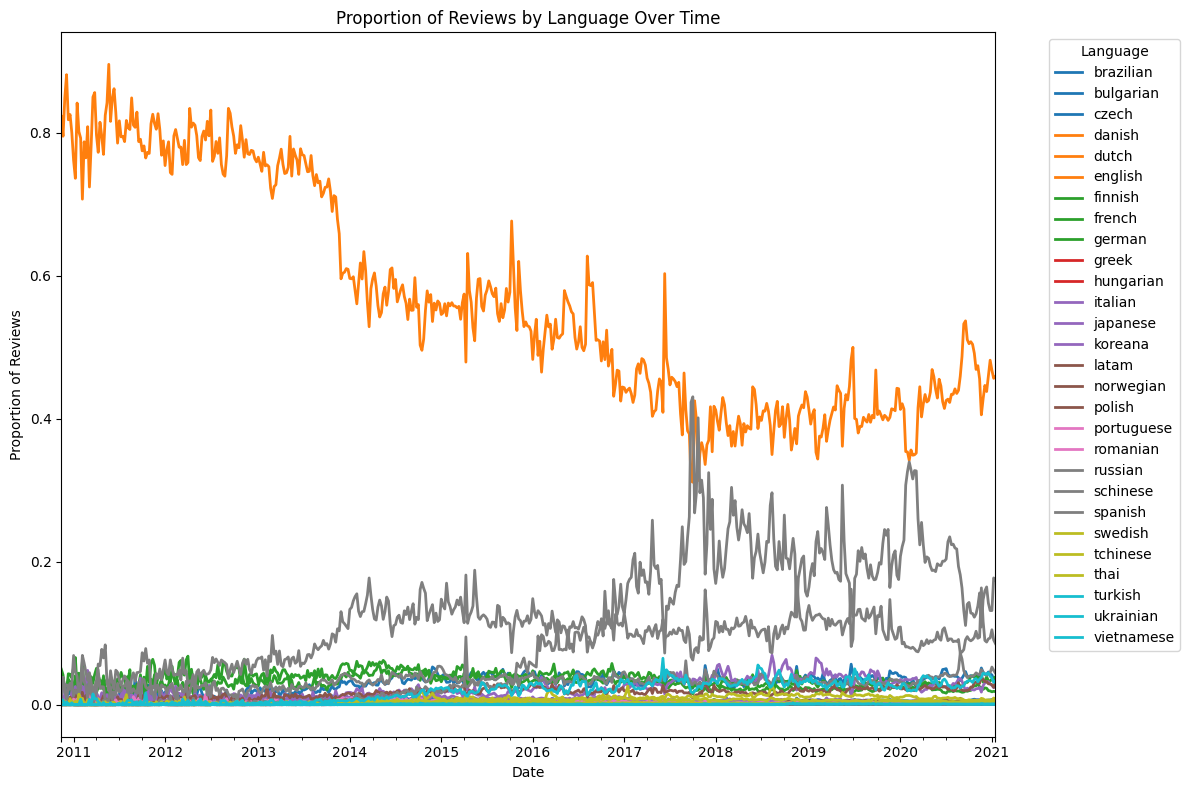

In [67]:
# Group data by date_created and language, and count the number of reviews
language_time_data = data.groupby(['date_created', 'language']).size().reset_index(name='review_count')

# Calculate the total reviews per date
total_reviews_per_date = language_time_data.groupby('date_created')['review_count'].sum().reset_index(name='total_reviews')

# Merge the total reviews back into the language data
language_time_data = pd.merge(language_time_data, total_reviews_per_date, on='date_created')

# Calculate the proportion of reviews for each language
language_time_data['proportion'] = language_time_data['review_count'] / language_time_data['total_reviews']

# Pivot the data to create a matrix for plotting
language_pivot = language_time_data.pivot(index='date_created', columns='language', values='proportion').fillna(0)

# Plot the proportions over time
plt.figure(figsize=(12, 8))
language_pivot.plot(ax=plt.gca(), colormap='tab10', linewidth=2)

plt.title('Proportion of Reviews by Language Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

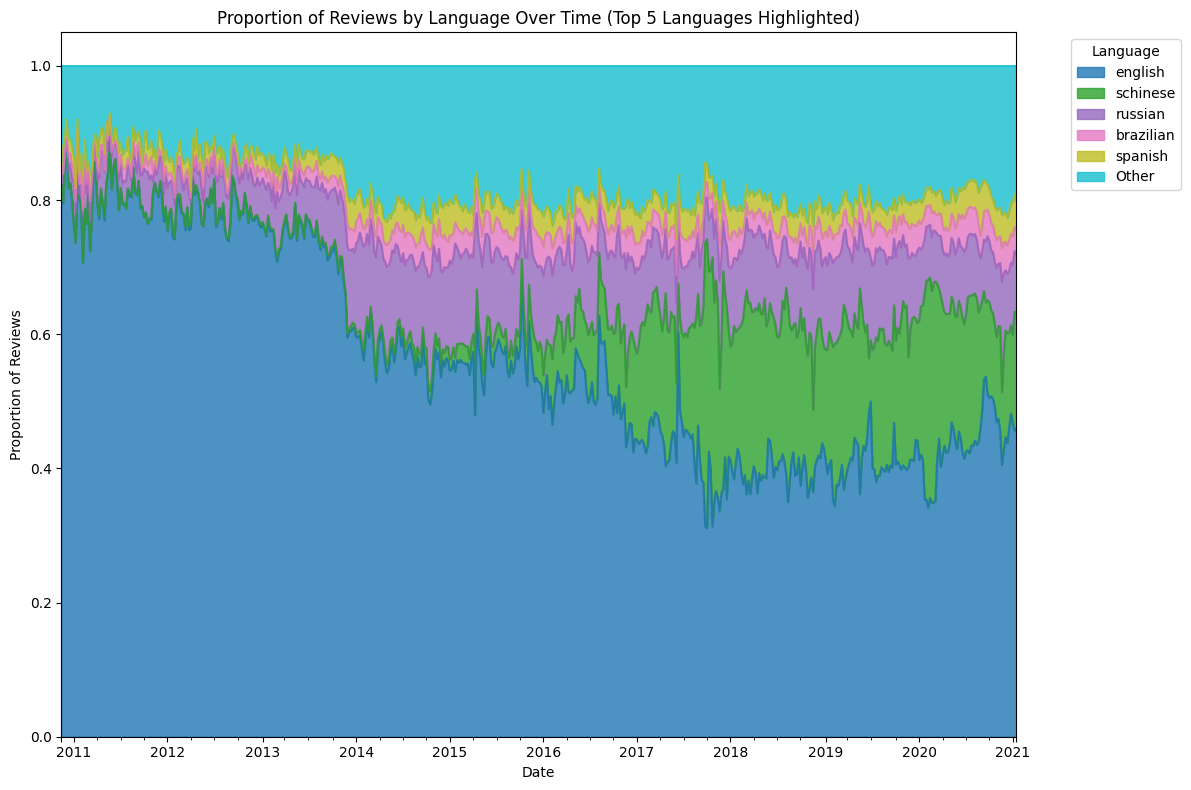

In [68]:
# Group data by date_created and language, and count the number of reviews
language_time_data = data.groupby(['date_created', 'language']).size().reset_index(name='review_count')

# Calculate the total reviews per date
total_reviews_per_date = language_time_data.groupby('date_created')['review_count'].sum().reset_index(name='total_reviews')

# Merge the total reviews back into the language data
language_time_data = pd.merge(language_time_data, total_reviews_per_date, on='date_created')

# Calculate the proportion of reviews for each language
language_time_data['proportion'] = language_time_data['review_count'] / language_time_data['total_reviews']

# Pivot the data to create a matrix for plotting
language_pivot = language_time_data.pivot(index='date_created', columns='language', values='proportion').fillna(0)

# Identify the top 5 most frequent languages
top_languages = language_time_data.groupby('language')['review_count'].sum().nlargest(5).index

# Separate the top 5 languages and group the rest as "Other"
language_pivot['Other'] = language_pivot.drop(columns=top_languages, errors='ignore').sum(axis=1)
language_pivot = language_pivot[top_languages.tolist() + ['Other']]

# Plot the stacked area chart
plt.figure(figsize=(12, 8))
language_pivot.plot.area(ax=plt.gca(), colormap='tab10', alpha=0.8)

plt.title('Proportion of Reviews by Language Over Time (Top 5 Languages Highlighted)')
plt.xlabel('Date')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()